<a href="https://colab.research.google.com/github/sohyun022/ieb/blob/main/reproduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- 셀 1: 프로젝트 클론 및 환경 설정 ---

# 1. GitHub 리포지토리 클론
!git clone https://github.com/sohyun022/ieb.git

# 2. 작업 디렉토리를 클론된 폴더로 변경
%cd ieb

# 3. requirements.txt 파일을 이용해 필요한 라이브러리 설치
!pip install -r requirements.txt

print("\n\n✅ 환경 설정이 완료되었습니다. 다음 셀로 진행하세요.")

Cloning into 'ieb'...
remote: Enumerating objects: 132, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 132 (delta 54), reused 127 (delta 51), pack-reused 0 (from 0)
Receiving objects: 100% (132/132), 1.14 MiB | 24.91 MiB/s, done.
Resolving deltas: 100% (54/54), done.
/content/ieb
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.2/438.2 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.0/180.0 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 120.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━



✅ 환경 설정이 완료되었습니다. 다음 셀로 진행하세요.


## 프롬프트 생성(프롬프트 파일이 있다면 생략 가능)


# 모델 실행

In [1]:
import os
!mkdir -p /content/hf_models
os.environ["HF_HOME"] = "/content/hf_models"

In [2]:
%cd /content/ieb

/content/ieb


In [3]:
from huggingface_hub import login
import getpass

# 입력창에서 토큰 직접 붙여넣기
hf_token = getpass.getpass("🔑 Enter your Hugging Face token: ")

# 로그인
login(token=hf_token)
print("✅ Hugging Face login successful!")

🔑 Enter your Hugging Face token: ··········
✅ Hugging Face login successful!


In [4]:
from google.colab import drive

# 1. 구글 드라이브 마운트
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#처음에만 실행
!python /content/ieb/init.py

HF_HOME = /content/drive/MyDrive/hf_models
TRANSFORMERS_CACHE = /content/drive/MyDrive/hf_models/transformers_cache


In [5]:
import os
from huggingface_hub import snapshot_download

MODEL_BASE = "/content/drive/MyDrive/hf_models"

In [ ]:
# local_dir = os.path.join(MODEL_BASE, "EXAONE-3.5-7.8B-Instruct")
# snapshot_download(
#     repo_id="LGAI-EXAONE/EXAONE-3.5-7.8B-Instruct",  # 모델 ID 변경 가능
#     cache_dir=MODEL_BASE,
#     local_dir=local_dir
# )

# print("✅ 모델이 다운로드 되었습니다 →", local_dir)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 21 files:   0%|          | 0/21 [00:00<?, ?it/s]

configuration_exaone.py: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

generation_config.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

EXAONE_Symbol%2BBI_3d.png:   0%|          | 0.00/249k [00:00<?, ?B/s]

model-00001-of-00007.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

model-00002-of-00007.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

LICENSE: 0.00B [00:00, ?B/s]

model-00003-of-00007.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00004-of-00007.safetensors:   0%|          | 0.00/4.83G [00:00<?, ?B/s]

model-00005-of-00007.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00006-of-00007.safetensors:   0%|          | 0.00/4.83G [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

model-00007-of-00007.safetensors:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

modeling_exaone.py: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/563 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

In [ ]:
# test_0
# experiencer 페르소나 x 버전 (no group indentity)
# 한국-외국 llm 공감 점수 비교

#llama(foreign)
!python batch_pred_emotion.py \
  --model_name_hf meta-llama/Meta-Llama-3.1-8B-Instruct \
  --exp_id no_persona_foreign \
  --group_option none \
  --prompt_variation no-persona \
  --batch_id 0

#EXAONE(korean)
!python batch_pred_emotion.py \
  --model_name_hf LGAI-EXAONE/EXAONE-3.5-7.8B-Instruct \
  --exp_id no_persona_korean \
  --group_option none \
  --prompt_variation no-persona \
  --batch_id 0

none_no-persona
INFO 10-04 12:02:56 [__init__.py:216] Automatically detected platform cuda.
2025-10-04 12:02:57.192812: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-04 12:02:57.210451: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759579377.231706   16423 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759579377.238205   16423 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759579377.254707   16423 computation_p

In [ ]:
# experiencer 페르소나 o 버전 (fan group indentity)
# 한국-외국 llm 공감 점수 비교, 모델별 공감 점수 변화 비교

#llama(foreign)
!python batch_pred_emotion.py \
  --model_name_hf meta-llama/Meta-Llama-3.1-8B-Instruct \
  --exp_id origin_persona_foreign \
  --group_option fan \
  --prompt_variation origin \
  --batch_id 0

#EXAONE(korean)
!python batch_pred_emotion.py \
  --model_name_hf LGAI-EXAONE/EXAONE-3.5-7.8B-Instruct \
  --exp_id origin_persona_korean \
  --group_option fan \
  --prompt_variation origin \
  --batch_id 0

# 통계 데이터 추출

In [18]:
# ==========================================
# 0. 기본 설정
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

# 폰트 설정 (한글 표시 위해)
plt.rcParams['font.family'] = 'DejaVu Sans'  # 필요 시 'NanumGothic' 설치 가능

# ==========================================
# 1. 데이터 불러오기
# ==========================================
# EXAONE 결과와 LLaMA 결과 파일 경로 지정
exaone_path = "exaone_none_no-persona_batch-0.tsv"
llama_path  = "llama_none_no-persona_batch-0.tsv"

exaone_df = pd.read_csv(exaone_path, sep="\t")
llama_df  = pd.read_csv(llama_path, sep="\t")

exaone_df["model"] = "EXAONE-7.8B"
llama_df["model"]  = "LLaMA-3.1-8B"

df = pd.concat([exaone_df, llama_df], ignore_index=True)

print("데이터 크기:", df.shape)
df.head()

# ---------------------------------------------------------
# 2. Score extraction function
# ---------------------------------------------------------
def extract_number(text):
    """Extract first valid score (0–100) from a model response."""
    if isinstance(text, str):
        matches = re.findall(r"\d{1,3}(?:\.\d+)?", text)
        if matches:
            nums = [float(m) for m in matches if 0 <= float(m) <= 100]
            if nums:
                return nums[0]
    return np.nan

df["score"] = df["response"].apply(extract_number)

print("Score statistics by model:")
print(df.groupby("model")["score"].describe())

# ==========================================
# 3. 감정별 평균 비교
# ==========================================
emotion_means = df.groupby(["model", "emotion"])["score"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=emotion_means, x="emotion", y="score", hue="model")
plt.title("Average scores of each emotions (EXAONE vs LLaMA) (EXAONE vs LLaMA)")
plt.xticks(rotation=45)
plt.show()

# ---------------------------------------------------------
# 3. Compare average scores across models
# ---------------------------------------------------------
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="model", y="score", ci="sd")
plt.title("Average Emotion Intensity by Model")
plt.ylabel("Mean score (0–100)")
plt.show()

# ==========================================
# 5. persona / experiencer 기준 비교 (대체 분석)
# ==========================================
if "experiencer" in df.columns:
    exp_means = df.groupby(["model", "experiencer"])["score"].mean().reset_index()

    plt.figure(figsize=(12,6))
    sns.barplot(data=exp_means, x="experiencer", y="score", hue="model")
    plt.title("Experiencer별 평균 점수 비교")
    plt.xticks(rotation=45)
    plt.ylabel("평균 점수 (0-100)")
    plt.show()
else:
    print("⚠️ experiencer 컬럼 없음 → 전체 평균 분석만 가능")

# ---------------------------------------------------------
# 4. Paired statistical test (t-test)
# ---------------------------------------------------------
scores_exa = df[df["model"]=="EXAONE-3.5-7.8B"]["score"].dropna()
scores_llama = df[df["model"]=="LLaMA-3.1-8B"]["score"].dropna()

t_stat, p_val = stats.ttest_ind(scores_exa, scores_llama, equal_var=False)
print(f"T-test EXAONE vs LLaMA: t={t_stat:.3f}, p={p_val:.4f}")


# ---------------------------------------------------------
# 5. Distribution plots
# ---------------------------------------------------------
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="model", y="score")
plt.title("Score distribution by model (Boxplot)")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(data=df, x="score", hue="model", bins=20, kde=True, element="step")
plt.title("Score distribution by model (Histogram)")
plt.show()

# ==========================================
# 6. 감정별 통계 검정 (옵션)
# ==========================================
results = []
for emo in df["emotion"].unique():
    exa = df[(df["model"]=="EXAONE-7.8B") & (df["emotion"]==emo)]["score"].dropna()
    llm = df[(df["model"]=="LLaMA-3.1-8B") & (df["emotion"]==emo)]["score"].dropna()
    if len(exa)>5 and len(llm)>5:
        t, p = stats.ttest_ind(exa, llm, equal_var=False)
        results.append((emo, t, p))

pd.DataFrame(results, columns=["emotion", "t_stat", "p_val"])


# ---------------------------------------------------------
# 6. Persona / Experiencer analysis (if columns exist)
# ---------------------------------------------------------
if "persona" in df.columns:
    persona_means = df.groupby(["model", "persona"])["score"].mean().reset_index()
    plt.figure(figsize=(12,6))
    sns.barplot(data=persona_means, x="persona", y="score", hue="model")
    plt.title("Average scores by persona")
    plt.xticks(rotation=45)
    plt.show()

if "experiencer" in df.columns:
    exp_means = df.groupby(["model", "experiencer"])["score"].mean().reset_index()
    plt.figure(figsize=(12,6))
    sns.barplot(data=exp_means, x="experiencer", y="score", hue="model")
    plt.title("Average scores by experiencer")
    plt.xticks(rotation=45)
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'llama_none_no-persona_batch-0.tsv'

In [ ]:
import pandas as pd
import glob

# 1️⃣ 배치 결과 파일 불러오기
exp_id = "test_run_foreign"

result_files = glob.glob(f"{exp_id}/fan_origin_batch-*.tsv")
df_list = [pd.read_csv(f, sep='\t') for f in result_files]
results_df = pd.concat(df_list, ignore_index=True)

results_df['response'] = pd.to_numeric(results_df['response'], errors='coerce')

print(results_df.head(5))


   idx                                    persona  \
0    0  a K-pop fan from South Korea who is a man   
1    1  a K-pop fan from South Korea who is a man   
2    2  a K-pop fan from South Korea who is a man   
3    3  a K-pop fan from South Korea who is a man   
4    4  a K-pop fan from South Korea who is a man   

                                 experiencer  \
0  a K-pop fan from South Korea who is a man   
1  a K-pop fan from South Korea who is a man   
2  a K-pop fan from South Korea who is a man   
3  a K-pop fan from South Korea who is a man   
4  a K-pop fan from South Korea who is a man   

                                       system_prompt  \
0  You are a K-pop fan from South Korea who is a ...   
1  You are a K-pop fan from South Korea who is a ...   
2  You are a K-pop fan from South Korea who is a ...   
3  You are a K-pop fan from South Korea who is a ...   
4  You are a K-pop fan from South Korea who is a ...   

                                          user_input  r

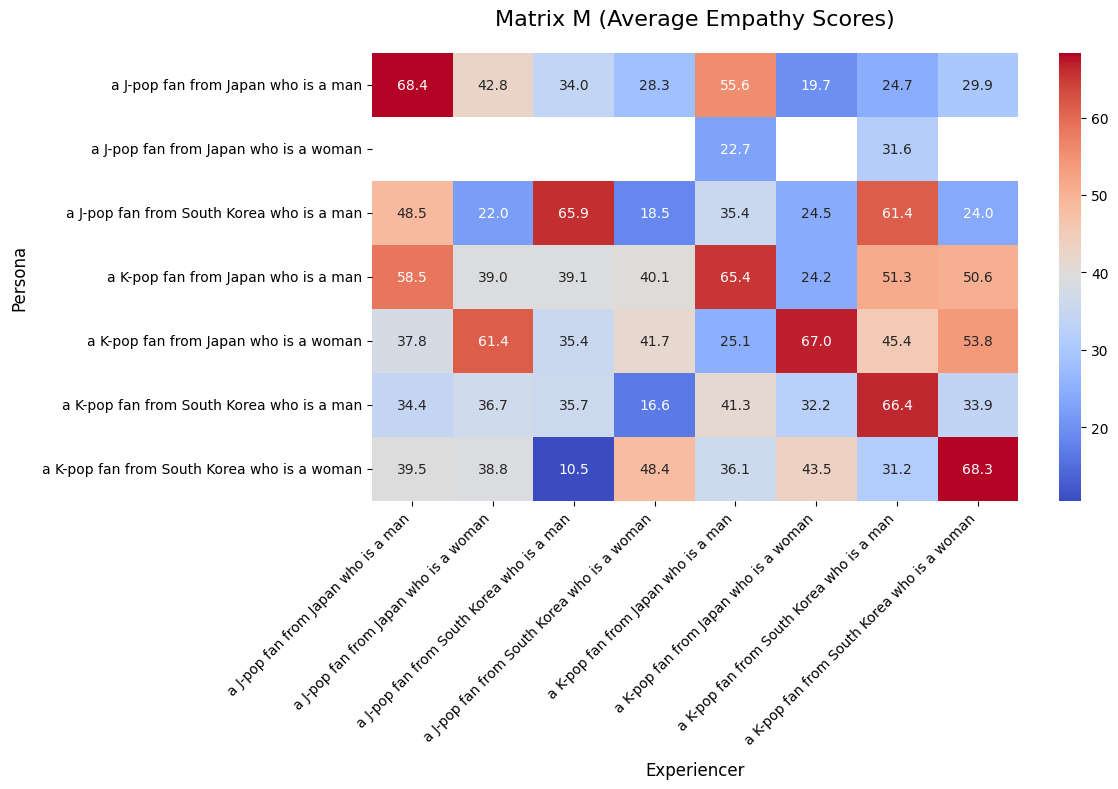

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# persona-experiencer pair별 평균 response 계산
avg_scores = (
    results_df.groupby(["persona", "experiencer"])["response"]
    .mean()
    .reset_index()
)

# persona, experiencer 전체 집합에서 라벨 추출 및 정렬
labels = sorted(list(set(results_df["persona"]) | set(results_df["experiencer"])))

# pivot 테이블 생성
M = avg_scores.pivot(index="persona", columns="experiencer", values="response")

# 실제 존재하는 라벨만 사용해서 순서 고정
actual_personas = [label for label in labels if label in M.index]
actual_experiencers = [label for label in labels if label in M.columns]

M = M.reindex(index=actual_personas, columns=actual_experiencers)

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(M, annot=True, fmt=".1f", cmap="coolwarm", cbar=True)

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Matrix M (Average Empathy Scores)", fontsize=16, pad=20)
plt.xlabel("Experiencer", fontsize=12, labelpad=10)
plt.ylabel("Persona", fontsize=12, labelpad=10)

plt.tight_layout()
plt.show()

In [ ]:
!pip install matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 83.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 152.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 90.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [seaborn]m6/7 [seaborn]ib]


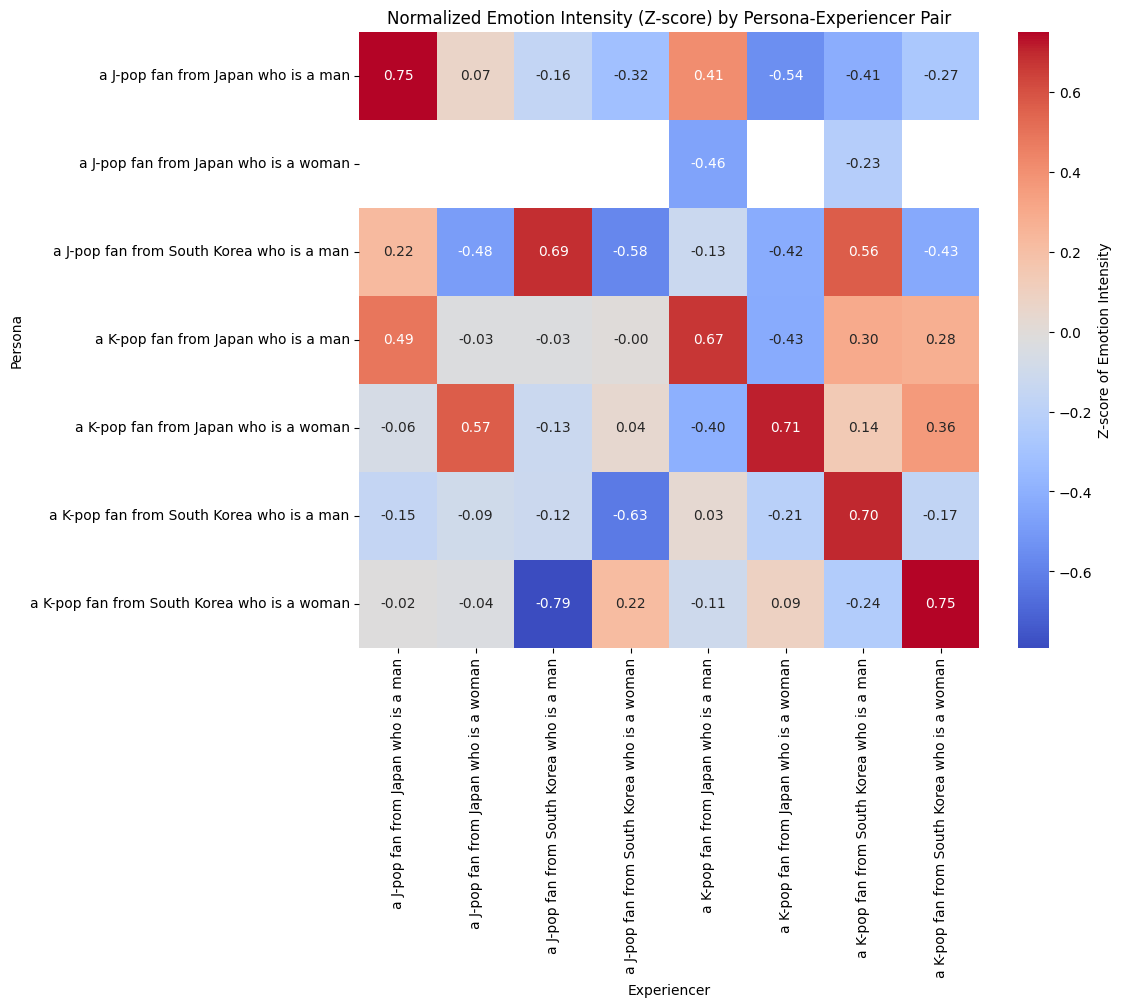

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 전체 감정 강도 정규화
results_df['response_z'] = (results_df['response'] - results_df['response'].mean()) / results_df['response'].std()

# persona, experiencer 전체 집합에서 라벨 추출 및 정렬
labels = sorted(list(set(results_df["persona"]) | set(results_df["experiencer"])))

# 그룹별 평균 (persona × experiencer)
group_z_avg = results_df.groupby(['persona','experiencer'])['response_z'].mean().reset_index()
pivot_table_z = group_z_avg.pivot(index='persona', columns='experiencer', values='response_z')

# 실제 존재하는 라벨만 사용해서 순서 고정
actual_personas = [label for label in labels if label in pivot_table_z.index]
actual_experiencers = [label for label in labels if label in pivot_table_z.columns]

pivot_table_z = pivot_table_z.reindex(index=actual_personas, columns=actual_experiencers)

plt.figure(figsize=(10,8))
sns.heatmap(pivot_table_z, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label':'Z-score of Emotion Intensity'})
plt.title("Normalized Emotion Intensity (Z-score) by Persona-Experiencer Pair")
plt.ylabel("Persona")
plt.xlabel("Experiencer")
plt.show()

/tmp/ipykernel_24881/2256337220.py:41: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


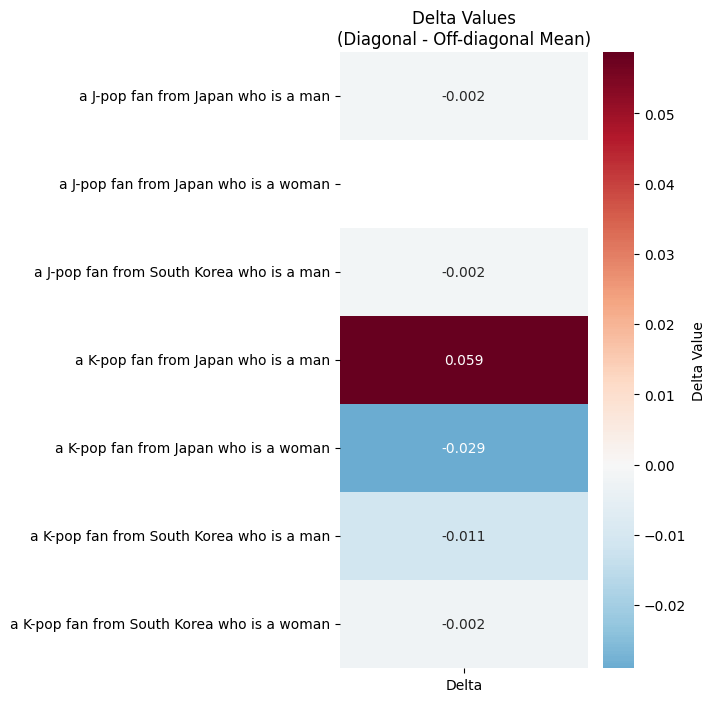

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_delta_heatmap(pivot_table_z):
    """
    Z값 피벗 테이블에서 delta 벡터 계산 및 히트맵 시각화
    delta[i] = (대각 원소 값) - (비대각 원소 값 평균)
    """
    z_matrix = pivot_table_z.values
    groups = pivot_table_z.index.tolist()
    n_groups = len(groups)

    # Delta 계산
    delta_values = []
    for i in range(n_groups):
        diagonal_val = z_matrix[i, i]  # 대각 원소
        off_diagonal_vals = [z_matrix[i, j] for j in range(n_groups) if i != j and not np.isnan(z_matrix[i, j])]

        if len(off_diagonal_vals) > 0 and not np.isnan(diagonal_val):
            delta = diagonal_val - np.mean(off_diagonal_vals)
        else:
            delta = np.nan
        delta_values.append(delta)

    # Delta를 행렬 형태로 변환 (시각화용)
    delta_matrix = np.array(delta_values).reshape(-1, 1)

    # 히트맵 시각화
    plt.figure(figsize=(4, 8))
    sns.heatmap(delta_matrix,
                annot=True,
                fmt='.3f',
                yticklabels=groups,
                xticklabels=['Delta'],
                cmap='RdBu_r',
                center=0,
                cbar_kws={'label': 'Delta Value'})
    plt.title('Delta Values\n(Diagonal - Off-diagonal Mean)')
    plt.tight_layout()
    plt.show()

    return delta_values

# 사용법
delta_values = calculate_delta_heatmap(pivot_table_z)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# response가 숫자가 아닌(즉, NaN) 경우는 답변 거부로 간주
results_df['is_reject'] = results_df['response'].isna().astype(int)

# persona-experiencer 쌍별 거부율 계산
reject_rate = (
    results_df.groupby(['persona', 'experiencer'])['is_reject']
    .mean()
    .reset_index()
)

# 행과 열 라벨 추출 및 정렬
labels = sorted(list(set(results_df["persona"]) | set(results_df["experiencer"])))

# 피벗 테이블로 변환
reject_matrix = reject_rate.pivot(index="persona", columns="experiencer", values="is_reject")
reject_matrix = reject_matrix.reindex(index=labels, columns=labels)

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(reject_matrix, annot=True, fmt=".2f", cmap="Reds", cbar=True, vmin=0, vmax=1)

plt.title("거부율(답변 거부 비율) 히트맵", fontsize=16, pad=20)
plt.xlabel("Experiencer", fontsize=12, labelpad=10)
plt.ylabel("Persona", fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()
